## TSF DS Internship, July 2020, Task 2 : To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

File type: csv

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
url = 'https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df = pd.read_csv(path)

In [139]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [141]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [142]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

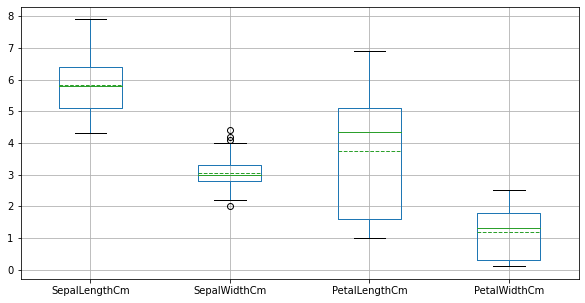

In [143]:
df.select_dtypes(include=['float64']).boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True, figsize=(10,5), layout=None, return_type=None, showmeans=True, meanline=True)

In [144]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [145]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [146]:
from sklearn.preprocessing import MinMaxScaler

In [147]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [148]:
X.shape

(150, 4)

Check cluster tendency

In [149]:
from pyclustertend import hopkins

In [150]:
hopkins(X,150)

0.17100806437255606

The data seems to be uniformly distributed.

Check optimal cluster count 

In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [152]:
ssd = []
ss = []
for i in range(2, 11):
    model = KMeans(n_clusters = i, random_state = 0)
    model.fit(X)
    ssd.append(model.inertia_)
    label = model.predict(X)
    ss.append(silhouette_score(X, label))

Text(0, 0.5, 'Silhouette score')

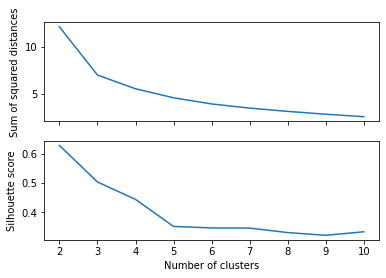

In [153]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
plt.xlabel('Number of clusters')
ax1.plot(range(2, 11), ssd)
ax1.set_ylabel("Sum of squared distances")
ax2.plot(range(2, 11), ss)
ax2.set_ylabel("Silhouette score")

The elbow can be 3 or 4 clusters, but the silhouette score is greater for 3 clusters.

Creating a model with 3 clusters and adding the predicted label to data set

In [154]:
model = KMeans(n_clusters = 3, random_state = 0)
label = model.fit_predict(X)

In [155]:
df['predicted_label'] = label

In [156]:
df.groupby(['Species','predicted_label']).count()

Id  SepalLengthCm  SepalWidthCm  \
Species         predicted_label                                    
Iris-setosa     1                50             50            50   
Iris-versicolor 0                 3              3             3   
                2                47             47            47   
Iris-virginica  0                36             36            36   
                2                14             14            14   

                                 PetalLengthCm  PetalWidthCm  
Species         predicted_label                               
Iris-setosa     1                           50            50  
Iris-versicolor 0                            3             3  
                2                           47            47  
Iris-virginica  0                           36            36  
                2                           14            14

In [157]:
centroids = scaler.inverse_transform(model.cluster_centers_)

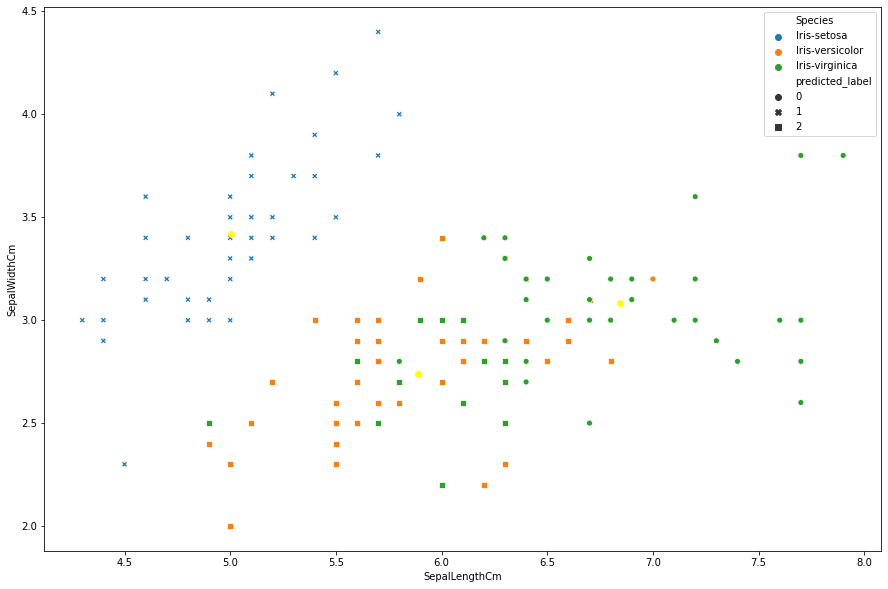

In [158]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', style='predicted_label', data=df, palette=None)
plt.scatter(centroids[:, 0], centroids[:,1], c = 'yellow')